# K-means

## Algo
1. Define ```k``` and ```max_iter``` (maximum number of_iterations)
2. Compute *k* random centroids
3. Until max number of iterations not reached:
    - Assign to each training sample its nearest centroid
    - Udpate centroid coordinates

In [1]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import math

class MyKmeans:
    '''
    desc: Implementation of Kmeans algorithm
    1.Define k and max_iter (maximum number of_iterations)
    2.Compute k random centroids
    3.Until max number of iterations not reached:
        - Assign to each training sample its nearest centroid
        - Udpate centroid coordinates
    '''
    def __init__(self, k, max_iter=100, verbose=False, random_state=42): #random state = 42
        self.k = k
        self.verbose = verbose
        self.rs = random_state
        self.centroids = None
        self.max_iter = max_iter
        self.labels = np.array(range(self.k))
        self.classes = None
        self.inertia = None
        if verbose:
            print('*****  Initialization of Kmeans with {} clusters  *****'.format(self.k))
            print('\tmax_iter: \t', self.max_iter)
            print('\tlabels: \t', self.labels)
            print('\trandom state: \t', self.rs)
            print('\tverbose: \t', self.verbose)                                 
            print('******************************************************')
            
    def closest(self, X):
        #self.centroids
        nearest = []
        for i in range(X.shape[0]):
            resultat = math.inf
            for j in range(self.k):                
                tmp = (X[i,0]-self.centroids[j][0])**2 + (X[i,1]-self.centroids[j][1])**2
                if(tmp < resultat):
                    resultat = tmp
                    classe = j
            
            nearest.append(classe)
        return nearest
    
    def fit(self, X):
        '''
        desc: This function trains kmeans on X with k clusters
            --> At the end, a label will be assigned to each sample of X and be stored in classes attribute
        '''
        # init centroids
        ranges = [[min(X[:,0]), max(X[:,0])], [min(X[:,1]), max(X[:,1])]] # cf. init_centroids function for more information
        self.init_centroids(ranges)

        # until stopping criteria is reached ... :
        for i in range(self.max_iter):
            # assign label to each sample : 
            
            # (hint : use knn)
            current_clusters = self.closest(X) # here are stored the current nearest cluster of each sample in X
            
            # update centroids coordinates
            new_centers = [] # here will be stored the new centroids of previous clusters                  
            for j in range(self.k):
                new_centers.append([0,0])
            
            for j in range(X.shape[0]):
                new_centers[current_clusters[j]][0] += X[j,0]
                new_centers[current_clusters[j]][1] += X[j,1]
           
            new_centers = np.array(new_centers)
            # Compter le nombre de cases qui vallent chaque classe.
            
            for j in range(self.k):                   
                new_centers[j]  = new_centers[j] / current_clusters.count(j)
            
            # TODO
            # looking for convergence
            # facultative (end the loop before reaching max number of iterations if convergence)
            
            self.centroids = new_centers # updating old centroids with new ones 
            
        self.classes = current_clusters # here are stored the nearest cluster of each sample in X
        
        # computing inertia
        self.ssd(X)
        
        if self.verbose:
            print('Model trained in {} iterations...'.format(i+1))
        
        
        
    def init_centroids(self, ranges):
        '''
        desc: Compute self.k random centroids defined within specified ranges
        each row in ranges correspond to a feature
        two columns in range (col1 : min value, col2 : max value)
        '''
        # Setting seed
        np.random.seed(self.rs)
        
        # Computing k centroids
        self.centroids = []
        
        for i in range(self.k):
            self.centroids.append([np.random.uniform(ranges[0][0], ranges[0][1]), np.random.uniform(ranges[1][0], ranges[1][1])])
            
        return self.centroids
    
    def ssd(self,X):
        '''
        Compute sum of squared distances (inertia)
        Used for elbow method
        '''
        res = 0
        
        for i in range(self.k):
            tmp = 0
            for j in range(len(self.classes)):
                if self.classes[j] == i:
                    tmp+= (X[j,0]-self.centroids[i][0])**2 + (X[j,1]-self.centroids[i][1])**2
                    
            res+=tmp
        
        self.inertia = res
        
    def predict(self,X):
        '''
        Assign the nearest cluster to each sample of X
        Kmeans has to be trained before using this function
        '''
        predictions = self.closest(X)  
        return predictions
    
   
        

## 1. Visualisation des données

In [2]:
import pandas as pd
df = pd.read_csv('Customers_practice.csv')
print(df.head(10))
print(df.shape)

X = np.array(df)

   Annual_Income_(k$)  Spending_Score
0                 103              85
1                  60              52
2                  59              55
3                  62              55
4                  48              47
5                  44               5
6                  73               5
7                  33              92
8                  71              75
9                  21              66
(170, 2)


Comme nous pouvons le voir avec la fonction shape, le dataset comporte 170 exemples et 2 descripteurs

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

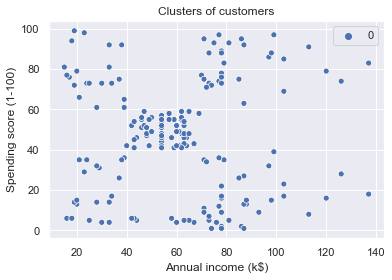

In [4]:
graph = sns.scatterplot(df["Annual_Income_(k$)"],df["Spending_Score"], hue=0).set(title="Clusters of customers", xlabel="Annual income (k$)", ylabel="Spending score (1-100)")

## 2. K-means algorithm

In [5]:
km=MyKmeans(3, verbose=True)

*****  Initialization of Kmeans with 3 clusters  *****
	max_iter: 	 100
	labels: 	 [0 1 2]
	random state: 	 42
	verbose: 	 True
******************************************************


In [6]:
km.fit(df.values)

Model trained in 100 iterations...


[53 62]
[102  43]
[51 13]


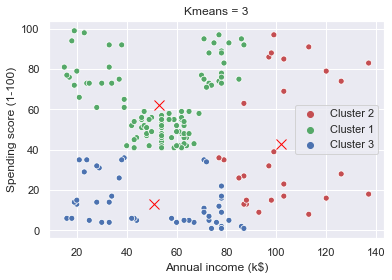

In [7]:
clusters = ["Cluster "+str(km.classes[i] + 1) for i in range(df.shape[0])]

graph = sns.scatterplot(df["Annual_Income_(k$)"],df["Spending_Score"], hue=clusters, palette=["r","g","b"])
graph.set(title="Kmeans = {}".format(km.k), xlabel="Annual income (k$)", ylabel="Spending score (1-100)")
#graph.legend(title='Clusters', loc='upper right', labels=['Cluster 1', 'Cluster 2', 'Cluster 3'])

# plt.scatter(df["Annual_Income_(k$)"],df["Spending_Score"], marker='o', c=km.classes)
# plt.title("Kmeans = {}".format(km.k), loc='center', fontweight='bold', fontsize='14')
# plt.xlabel("Annual income (k$)", fontweight='bold', fontsize='12', horizontalalignment='center')
# plt.ylabel("Spending score (1-100)", fontweight='bold', fontsize='12', horizontalalignment='center')

for i in range(km.k):
    graph.plot(km.centroids[i][0], km.centroids[i][1], marker='x', markersize=10, color="red")
    print(km.centroids[i])

Les coordonnées des 3 centroïdes sont ici :
- (86,82)
- (87,19)
- (44,49)

## 3. Trouver la valeur optimale de k

In [8]:
sse = []
for i in range(1,21):
    km=MyKmeans(i, verbose=False)
    km.fit(df.values)
    sse.append([i, km.inertia])
    
print(sse)

[[1, 252379], [2, 158083], [3, 123284], [4, 69183], [5, 42538], [6, 40831], [7, 33654], [8, 31662], [9, 23736], [10, 19932], [11, 17172], [12, 14937], [13, 13762], [14, 12894], [15, 11199], [16, 10720], [17, 10290], [18, 9926], [19, 9056], [20, 8184]]


[Text(0, 0.5, 'SSE'),
 Text(0.5, 0, 'Amount of clusters'),
 Text(0.5, 1.0, 'The Elbow method')]

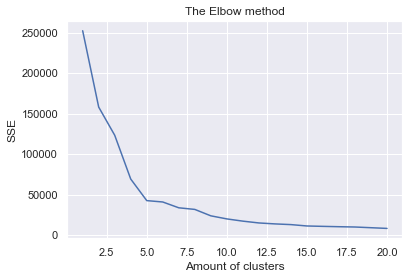

In [9]:
sse_df = pd.DataFrame(sse,columns=['Amount of clusters','SSE'])
sse_graph = sns.lineplot(data=sse_df, x="Amount of clusters", y="SSE")
sse_graph.set(title="The Elbow method", xlabel="Amount of clusters", ylabel="SSE")

En utilisant la méthode du coude et par lecture graphique, nous voyons qu'une quantité de clusters adaptée serait 5

[86 82]
[85 13]
[28 15]
[25 78]
[54 48]


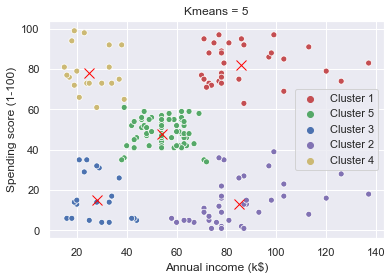

In [10]:
km=MyKmeans(5, verbose=False)
km.fit(df.values)

clusters = ["Cluster "+str(km.classes[i] + 1) for i in range(df.shape[0])]

graph = sns.scatterplot(df["Annual_Income_(k$)"],df["Spending_Score"], hue=clusters, palette=["r","g","b","m","y"])
graph.set(title="Kmeans = {}".format(km.k), xlabel="Annual income (k$)", ylabel="Spending score (1-100)")
#graph.legend(title='Clusters', loc='upper right', labels=['Cluster 1', 'Cluster 2', 'Cluster 3'])

# plt.scatter(df["Annual_Income_(k$)"],df["Spending_Score"], marker='o', c=km.classes)
# plt.title("Kmeans = {}".format(km.k), loc='center', fontweight='bold', fontsize='14')
# plt.xlabel("Annual income (k$)", fontweight='bold', fontsize='12', horizontalalignment='center')
# plt.ylabel("Spending score (1-100)", fontweight='bold', fontsize='12', horizontalalignment='center')

for i in range(km.k):
    graph.plot(km.centroids[i][0], km.centroids[i][1], marker='x', markersize=10, color="red")
    print(km.centroids[i])

Les coordonnées des 5 centroïdes sont ici :
- (86,82)
- (89,17)
- (26,18)
- (25,78)
- (55,49)

Le cluster 1 représente les clients ayant des revenus élevés et dépensant beaucoup <br>
Le cluster 2 représente les clients ayant des revenus élevés et dépensant peu <br>
Le cluster 3 représente les clients ayant des revenus faibles et dépensant peu <br>
Le cluster 4 représente les clients ayant des revenus faibles et dépensant beaucoup <br>
Le cluster 5 représente les clients ayant des revenus moyens et dépensant moyennement

## 4. Pas de partie 4

## 5 Aller plus loin

In [11]:
dftest = pd.read_csv('Customers_practice_test.csv')

FileNotFoundError: [Errno 2] File Customers_practice_test.csv does not exist: 'Customers_practice_test.csv'

In [ ]:
dftest.head(10)

In [ ]:
dftest.shape

In [ ]:
km = MyKmeans(5, verbose=True)
km.fit(df.values)

In [ ]:
def save(predictions):
    '''
    predictions of kmeans
    '''
    column = ['prediction']
    res_df = pd.DataFrame(predictions, columns=column)
    print(res_df)
    res_df.to_csv('resultats.csv', index=None)

In [ ]:
preds = km.predict(dftest.values)
print(preds)

In [ ]:
save(preds) # execute the cell to generate resultats.csv

In [ ]:
clusters = ["Cluster "+str(preds[i] + 1) for i in range(dftest.shape[0])]

graph = sns.scatterplot(dftest["Annual_Income_(k$)"],dftest["Spending_Score"], hue=clusters, palette=["r","g","b","m","y"])
graph.set(title="Kmeans = {}".format(km.k), xlabel="Annual income (k$)", ylabel="Spending score (1-100)")
#graph.legend(title='Clusters', loc='upper right', labels=['Cluster 1', 'Cluster 2', 'Cluster 3'])

# plt.scatter(df["Annual_Income_(k$)"],df["Spending_Score"], marker='o', c=km.classes)
# plt.title("Kmeans = {}".format(km.k), loc='center', fontweight='bold', fontsize='14')
# plt.xlabel("Annual income (k$)", fontweight='bold', fontsize='12', horizontalalignment='center')
# plt.ylabel("Spending score (1-100)", fontweight='bold', fontsize='12', horizontalalignment='center')

for i in range(km.k):
    graph.plot(km.centroids[i][0], km.centroids[i][1], marker='x', markersize=10, color="red")
    print(km.centroids[i])

Les coordonnées des 5 centroïdes sont ici :
- (86,82)
- (89,17)
- (26,18)
- (25,78)
- (55,49)

In [ ]:
from matplotlib.colors import ListedColormap

X = np.array(dftest)
y = np.array(preds)
h = 0.1
#Les couleurs
cmap_bg = ListedColormap(['b','y','g','m','r'])
cmap_dot = ListedColormap(['aqua','gold','lime','fuchsia','crimson'])

# Création de la grille qui défini les zones de classe en 
#prédisant l'appartenance des points de la grille grace au NM
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = km.predict(np.array(np.c_[xx.ravel(), yy.ravel()]))

# Defninition des couleurs pour les zones
Z = np.array(Z).reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_bg)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_dot, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Kmeans = 5")

for i in range(km.k):
    plt.plot(km.centroids[i][0], km.centroids[i][1], marker='x', markersize=10, color="white")